In [1]:
import tushare as ts
import time
import datetime
import sys
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
sys.path.append('../Codes')
import DataProcessor as DP
from DataProcessor import centralize
from DataProcessor import standardize
from DataProcessor import standardize_industry
from DataProcessor import get_industrys
from DataProcessor import get_all_industrys
from DataProcessor import get_stock_daily_data
from DataProcessor import get_stock_money_data
from DataProcessor import get_index_data

In [2]:
#行业轮动

In [3]:
#获取行业分类
industrys = DP.get_all_industrys()

In [466]:
#industrys
#industry = list(DP.get_industrys('L1').keys())
industry=['801010.SI',
          #'801020.SI',
          #'801030.SI',
          #'801040.SI',
          #'801050.SI',
          '801080.SI',
          '801130.SI',
          '801140.SI',
          '801150.SI',
          '801200.SI',
          '801210.SI',
          '801710.SI',
          '801730.SI',
          '801740.SI',
          '801750.SI',
          '801770.SI',
          '801780.SI',
          '801880.SI',
          '801890.SI',
          
          '801081.SI',
          '801124.SI',
          '801153.SI',
          '801752.SI',
          '801761.SI',
          '801193.SI',
          '801194.SI',
          '801222.SI',
         ]
#取行业内股票数据
data = DP.get_index_data(industrys=industrys, industry=industry)

#money_dic = get_stock_money_data(industry)

In [475]:
#因子构造
OPEN = np.log(data['open'])
HIGH = np.log(data['high'])
LOW = np.log(data['low'])
CLOSE = np.log(data['close'])

trf = data['trf']
ltrf = np.log(trf)

rzrqye = (data['rzye'] - data['rqye']).fillna(method='ffill')
gt = data['gt_amount'].fillna(method='ffill')

In [541]:
ror = CLOSE - CLOSE.shift()
r_rinei = CLOSE - OPEN
r_geye = OPEN - CLOSE.shift()
rh = HIGH - OPEN
rl = LOW - OPEN
hl = rh - rl
vr = ltrf - ltrf.shift()
d_rzrq = rzrqye / rzrqye.shift()
d_rzrq.fillna(1, inplace=True)
d_gt = gt / gt.shift()
d_gt.fillna(1, inplace=True)

In [542]:
n = 2
y = standardize(ror.rolling(n).sum().shift(-n+1) - r_geye)
y[(r_geye > 0.09).fillna(False) & (r_rinei.abs() < 1e-6).fillna(False)] = 0

In [707]:
x1 = standardize(r_rinei)
x2 = standardize(r_rinei.rolling(1).mean().shift(1))
x3 = standardize(r_rinei.rolling(3).mean().shift(2))
x4 = standardize(r_rinei.rolling(5).mean().shift(5))
x5 = standardize(r_rinei.rolling(10).mean().shift(10))

z1 = standardize(r_geye)
z2 = standardize(r_geye.rolling(1).mean().shift(1))
z3 = standardize(r_geye.rolling(3).mean().shift(2))
z4 = standardize(r_geye.rolling(5).mean().shift(5))
z5 = standardize(r_geye.rolling(10).mean().shift(10))

u1 = x1 - z1
u2 = x2 - z2
u3 = x3 - z3
u4 = x4 - z4
u5 = x5 - z5

r1 = x1 + z1
r2 = x2 + z2
r3 = x3 + z3
r4 = x4 + z4
r5 = x5 + z5

h1 = standardize(rh)
h2 = standardize(rh).rolling(1).mean().shift(1)
h3 = standardize(rh).rolling(3).mean().shift(2)
h4 = standardize(rh).rolling(5).mean().shift(5)
h5 = standardize(rh).rolling(10).mean().shift(10)

l1 = standardize(rl)
l2 = standardize(rl).rolling(1).mean().shift(1)
l3 = standardize(rl).rolling(3).mean().shift(2)
l4 = standardize(rl).rolling(5).mean().shift(5)
l5 = standardize(rl).rolling(10).mean().shift(10)

hl1 = h1 - l1
hl2 = h2 - l2
hl3 = h3 - l3
hl4 = h4 - l4
hl5 = h5 - l5

ch1 = x1 - h1
ch2 = x2 - h2
ch3 = x3 - h3
ch4 = x4 - h4
ch5 = x5 - h5

cl1 = x1 - l1
cl2 = x2 - l2
cl3 = x3 - l3
cl4 = x4 - l4
cl5 = x5 - l5


vr1 = standardize(vr)
vr2 = standardize(vr).rolling(1).mean().shift(1)
vr3 = standardize(vr).rolling(3).mean().shift(2)
vr4 = standardize(vr).rolling(5).mean().shift(5)
vr5 = standardize(vr).rolling(10).mean().shift(10)
'''
rzrq1 = standardize(d_rzrq).fillna(0)
rzrq2 = standardize(d_rzrq.rolling(1).mean().shift(1)).fillna(0)
rzrq3 = standardize(d_rzrq.rolling(3).mean().shift(2)).fillna(0)
rzrq4 = standardize(d_rzrq.rolling(5).mean().shift(5)).fillna(0)
rzrq5 = standardize(d_rzrq.rolling(10).mean().shift(10)).fillna(0)

gt1 = standardize(d_gt).fillna(0)
gt2 = standardize(d_gt.rolling(1).mean().shift(1)).fillna(0)
gt3 = standardize(d_gt.rolling(3).mean().shift(2)).fillna(0)
gt4 = standardize(d_gt.rolling(5).mean().shift(5)).fillna(0)
gt5 = standardize(d_gt.rolling(10).mean().shift(10)).fillna(0)
'''

'\nrzrq1 = standardize(d_rzrq).fillna(0)\nrzrq2 = standardize(d_rzrq.rolling(1).mean().shift(1)).fillna(0)\nrzrq3 = standardize(d_rzrq.rolling(3).mean().shift(2)).fillna(0)\nrzrq4 = standardize(d_rzrq.rolling(5).mean().shift(5)).fillna(0)\nrzrq5 = standardize(d_rzrq.rolling(10).mean().shift(10)).fillna(0)\n\ngt1 = standardize(d_gt).fillna(0)\ngt2 = standardize(d_gt.rolling(1).mean().shift(1)).fillna(0)\ngt3 = standardize(d_gt.rolling(3).mean().shift(2)).fillna(0)\ngt4 = standardize(d_gt.rolling(5).mean().shift(5)).fillna(0)\ngt5 = standardize(d_gt.rolling(10).mean().shift(10)).fillna(0)\n'

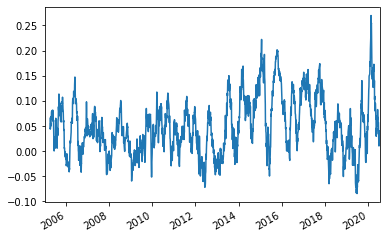

In [708]:
(cl5.shift()*y).mean(1).fillna(0).rolling(60).mean().plot()

In [709]:
factor = {
    'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4, 'x5':x5,
    'z1':z1, 'z2':z2, 'z3':z3, 'z4':z4, 'z5':z5,
    'u1':u1, 'u2':u2, 'u3':u3, 'u4':u4, 'u5':u5,
    'h1':h1, 'h2':h2, 'h3':h3, 'h4':h4, 'h5':h5,
    'l1':l1, 'l2':l2, 'l3':l3, 'l4':l4, 'l5':l5,
    'ch1':ch1, 'ch2':ch2, 'ch3':ch3, 'ch4':ch4, 'ch5':ch5,
    'cl1':cl1, 'cl2':cl2, 'cl3':cl3, 'cl4':cl4, 'cl5':cl5,
    'hl1':hl1, 'hl2':hl2, 'hl3':hl3, 'hl4':hl4, 'hl5':hl5,
    'vr1':vr1, 'vr2':vr2, 'vr3':vr3, 'vr4':vr4, 'vr5':vr5,
    #'rzrq1':rzrq1, 'rzrq2':rzrq2, 'rzrq3':rzrq3, 'rzrq4':rzrq4, 'rzrq5':rzrq5,
    #'gt1':gt1, 'gt2':gt2, 'gt3':gt3, 'gt4':gt4, 'gt5':gt5,
    
    #'rzrq':rzrq, 'gt':gt,
}

In [710]:
begin_date = '2010-01-01'
split_date = '2016-01-01'
train_date = y.index[(begin_date < y.index) & (y.index < split_date)]
test_date = y.index[y.index > split_date]

In [711]:
df_y_train = DataFrame({'y':y.loc[train_date, :].values.flatten()})
df_x_train = DataFrame({k:factor[k].loc[train_date, :].shift().values.flatten() for k in factor.keys()})
df_y_test = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test = DataFrame({k:factor[k].loc[test_date, :].shift().values.flatten() for k in factor.keys()})
df_train = pd.concat([df_y_train, df_x_train], axis=1)
df_test = pd.concat([df_y_test, df_x_test], axis=1)

In [721]:
model = smf.ols('y~+x1+x2+x3+x4+x5\
                  +z1+z2+z3+z4+z5\
                  \
                  \
                  ', data=df_train).fit()
model.tvalues

Intercept    3.303699e-16
x1           6.776925e+00
x2           3.640011e+00
x3           4.303723e+00
x4           9.808128e+00
x5           2.118399e+00
z1          -6.159916e+00
z2          -3.496025e+00
z3          -9.133166e+00
z4          -5.807830e+00
z5          -3.665637e+00
dtype: float64

801193.SI    0.242761
801081.SI    0.208073
801752.SI    0.194119
801140.SI    0.160004
801740.SI    0.089544
801761.SI    0.076508
801194.SI    0.066671
801130.SI    0.008168
801780.SI    0.007492
801710.SI   -0.028032
Name: 2020-07-17 00:00:00, dtype: float64


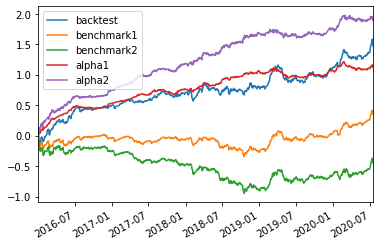

In [735]:
#调仓周期
m = 2
y_hat = DataFrame(model.predict(df_test).values.reshape(len(test_date), len(y.columns)), index=test_date, columns=y.columns)
q = 1 - 3 / len(y_hat.columns)
position = (y_hat.gt(y_hat.quantile(q, 1), 0))

ror_test = ror.loc[test_date, :]
r_rinei_test = r_rinei.loc[test_date, :]
r_geye_test = r_geye.loc[test_date, :]

ror_huice = position * (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
ror_huice[ror_huice==0] = np.nan
ror_huice.mean(1).cumsum().plot()

benchmark1 = (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
benchmark1.mean(1).cumsum().plot()
benchmark2 = ror_test
benchmark2.mean(1).cumsum().plot()

alpha1 = ror_huice.mean(1).cumsum() - benchmark1.mean(1).cumsum()
alpha2 = ror_huice.mean(1).cumsum() - benchmark2.mean(1).cumsum()
alpha1.plot()
alpha2.plot()
#for i in industry:
#    stock = industrys[i]
#    ror_test.loc[:,stock].mean(1).cumsum().plot()
plt.legend(['backtest', 'benchmark1', 'benchmark2', 'alpha1', 'alpha2'] + [i for i in industry])
print(y_hat.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

In [736]:
ror_huice.mean(1).iloc[-10:]

2020-07-06    0.023897
2020-07-07    0.006726
2020-07-08    0.024614
2020-07-09    0.016846
2020-07-10    0.030966
2020-07-13    0.021134
2020-07-14   -0.026065
2020-07-15   -0.060660
2020-07-16   -0.035193
2020-07-17         NaN
dtype: float64

In [737]:
position.sum(1)

2016-01-04    0
2016-01-05    3
2016-01-06    3
2016-01-07    3
2016-01-08    3
             ..
2020-07-13    3
2020-07-14    3
2020-07-15    3
2020-07-16    3
2020-07-17    3
Length: 1105, dtype: int64

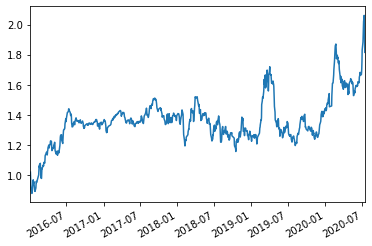

In [738]:
(ror_huice.mean(1)-0.0007+1).cumprod().plot()

In [741]:
df_y_test2 = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test2 = DataFrame({k:factor[k].loc[test_date, :].values.flatten() for k in factor.keys()})
df_test2 = pd.concat([df_y_test2, df_x_test2], axis=1)
y_hat2 = DataFrame(model.predict(df_test2).values.reshape(len(ror_test), len(ror_test.columns)), index=ror_test.index, columns=ror_test.columns)
print(y_hat2.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

801081.SI    0.250734
801752.SI    0.165125
801140.SI    0.126821
801761.SI    0.124934
801740.SI    0.118031
801124.SI    0.089958
801150.SI    0.030277
801130.SI    0.026003
801710.SI   -0.000033
801193.SI   -0.016295
Name: 2020-07-17 00:00:00, dtype: float64


In [465]:
df_train = df_train.dropna()
model = RandomForestRegressor(n_estimators=10).fit(df_train.iloc[:, 1:], df_train.iloc[:, 0])
model.feature_importances_

array([0.05159753, 0.05007378, 0.04443164, 0.04619165, 0.04480049,
       0.04128151, 0.04127881, 0.05454827, 0.05270984, 0.05264996,
       0.04963717, 0.05406033, 0.04655707, 0.04854932, 0.0502602 ,
       0.0494474 , 0.04531465, 0.04479211, 0.04590302, 0.0421521 ,
       0.04376315])